# Chapter 11 Exercises

In [1]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import logrank_test

import survive

import rpy2.robjects as robjects

from scipy import stats

%load_ext rpy2.ipython

## Conceptual Exercises

### Exercise 2

We conduct a study with $n=4$ participants who have just purchased cell phones, in order to model the time unti phone replacement.  The first participant replaces her phone after 1.2 years.  The second participant still has nt replaced her phone at the end of the two-year study period.  The third participant changes her phone and is lost to follow up (but has not yet replaced her phone) 1.5 years into the study.  The fourth participant replaces her phone after 0.2 years.

For each of the four participants $(i=1,...,4)$, answer the following questions using the notation introduced in Section 11.1:

#### 2a) Is the participant's cell phone replacement time censored?
A participant's cell phone replacement time is not censored if they replaced their phone before the 2 year study period was over, anything else is considered censored.
   * $i = 1$ is not censored because they replaced their phone in 1.2 years, which is before the end of the two year study period.
   * $i = 2$ is censored because they haven't replaced their cell phone by the study's end.
   * $i = 3$ is censored because to the best of our knowledge, this person hasn't replaced their phone.  Despite being lost to follow up, we can't assume they've replaced it.  Only observations where we have data showing the phone was replaced are to be considered uncensored.
   * $i = 4$ is not censored because they replaced their phone before the study was over.

#### 2b) Is the value of $c_i$ known, and if so, then what is it?
If a time is censored, then $c_i$ will exist and equal the time of censoring
   * $c_1$ does not exist, observation 1 was not censored
   * $c_2 = 2$ because observation 2 was censored when the study ended at 2 years
   * $c_3 = 1.5$ because observation 3 was censored when they were lost to follow up at 1.5 years into the study
   * $c_4$ does not exist, observation 4 was not censored

#### 2c) Is the value of $t_i$ known, and if so, then what is it?
If a time is not censored, then $t_i$ will exist and equal the time when a participant replaced their phone.
    
   * $t_1 = 1.2$ because observation 1 replaced their phone after 1.2 years
   * $t_2$ does not exist because observation 2 never replaced their phone during the study
   * $t_3$ does not exist because observation 3 never replaced their phone
   * $t_4 = 0.2$ because observation 4 replaced their phone after 0.2 years

#### 2d) Is the value of $y_i$ known, and if so, then what is it?
$$y_i = min(c_i, t_i)$$
   
   * $y_1=min(c_1,t_1)=t_1=1.2$ since $c_1$ does not exist
   * $y_2=min(c_2,t_2)=c_2=2$ since $t_2$ does not exist
   * $y_3=min(c_3,t_3)=c_3=1.5$ since $t_3$ does not exist
   * $y_4=min(c_4,t_4)=t_4=0.2$ since $c_4$ does not exist

#### 2e) Is the value of $\delta_i$ known, and if so, then what is it?

$\delta_i$ indicates whether observation $i$ was censored or not.
    
$\begin{equation}
    \delta =
    \left\{
    \begin{aligned}
    \ 1\ \ \ \  & \text{if }  & T \leq &C \text{ then the observation is not censored}\\
    \ 0 \ \ \ \ & \text{if }   & T >  &C  \text{ then the observation is censored}
    \end{aligned}
    \right.
\end{equation}$

   * $\delta_1 = 1$ because observation 1 was not censored
   * $\delta_2 = 0$ because observation 2 was censored
   * $\delta_3 = 0$ because observation 3 was censored
   * $\delta_4 = 1$ because observation 4 was not censored.

### Exercise 3
For the example in Exercise 2, report the values of $K, d_1,...,d_K, r_1,...,r_K, \text{ and } q_1,...q_K$, where this notation was defined in Section 11.3

 * $K=2$ because there are 2 unique "death" times among the non-censored patients
 * $d_1=0.2$ because this is the first unique death time among the non-censored patients
 * $d_K=d_2=1.2$ because this is the last unique death time among the non-censored patients
 * $r_1=4$ because there are 4 patients "alive" (in the study) just before $d_1$
 * $r_K=r_2=3$ because there are 3 patients "alive" (in the study) just before $d_2$
 * $q_1=1$ because one patient died at time $d_1$
 * $q_K=q_2=1$ because one patient died at time $d_2$

### Exercise 4
This problem makes use of the Kaplan-Meier survival curve displayed in Figure 11.9.  The raw data that went into plotting this survival curve is given in Table 11.4.  The coviariate column of that table is not needed for this problem.

![image](./images/fig_11_9.png)

#### 4a) What is the estimated probability of survival past 50 days?

Each point on a Kaplan Meier curve shows the estimated probability of surviving past the time indicated on the horizontal axis relative to that point.  

Using figure 11.9 above, $P(T>50) = 0.6$.  In other words, there's a 60% chance of survival beyond 50 days.

#### 4b) Write out an analytical expression for the estimated survival function.

![image](./images/tab_11_4.png)

Using the relationship $\hat{S}(t)=\hat{S}(d_k)$ and the equation below, with $k = 1, 2, 3$, because there are three unique "death" times for non-censored subjects:
\begin{equation*}
  \hat{S}(d_k)=\prod_{j=1}^{k} (\frac{r_j - q_j}{r_j})
\end{equation*}


\begin{equation*}
  \hat{S}(d_1)=\prod_{j=1}^{1} (\frac{r_j - q_j}{r_j})=\frac{r_1 - q_1}{r_1}=\frac{5-1}{5}=0.8
\end{equation*}

\begin{equation*}
  \hat{S}(d_2)=\prod_{j=1}^{2} (\frac{r_j - q_j}{r_j})=\frac{r_1 - q_1}{r_1}\cdot\frac{r_2 - q_2}{r_2}=\frac{5-1}{5}\cdot\frac{4-1}{4}=0.6
\end{equation*}

\begin{equation*}
  \hat{S}(d_3)=\prod_{j=1}^{3} (\frac{r_j - q_j}{r_j})=\frac{r_1 - q_1}{r_1}\cdot\frac{r_2 - q_2}{r_2}\cdot\frac{r_3-q_3}{r_3}=\frac{5-1}{5}\cdot\frac{4-1}{4}\cdot\frac{3-1}{3}=0.4
\end{equation*}


$\begin{equation}
    \hat{S}(t) =
    \left\{
    \begin{aligned}
    \ 1\ \ \ \  & \text{if }  & t < 26.5 \\
    \ 0.8  \ \ \ \ & \text{if }   & 26.5 \leq t <  37.2 \\
    \ 0.6  \ \ \ \ & \text{if }   & 37.2 \leq t <  57.3 \\
    \ 0.4  \ \ \ \ & \text{if }   & 57.3 \leq  t \\
    \end{aligned}
    \right.
\end{equation}$

##### Confirming using Python

In [2]:
obs_y = [26.5, 37.2, 57.3, 90.8, 20.2, 89.8]
cens_indicator = [1, 1, 1, 0, 0, 0]
cov_x = [0.1, 11, -0.3, 2.8, 1.8, 0.4]

ex_4_df = pd.DataFrame(data={"obs_y":obs_y, "cens_indicator":cens_indicator, "cov_x":cov_x})

In [3]:
ex_4_df = ex_4_df.sort_values(by=['obs_y']).reset_index(drop=True)
ex_4_df

,obs_y,cens_indicator,cov_x
0,20.2,0,1.8
1,26.5,1,0.1
2,37.2,1,11.0
3,57.3,1,-0.3
4,89.8,0,0.4
5,90.8,0,2.8


###### Confirming using the lifelines package in Python

In [4]:
kmf = KaplanMeierFitter()

T = ex_4_df['obs_y']
E = ex_4_df['cens_indicator']

kmf.fit( T, event_observed=E, alpha=1)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 6 total observations, 3 right-censored observations>

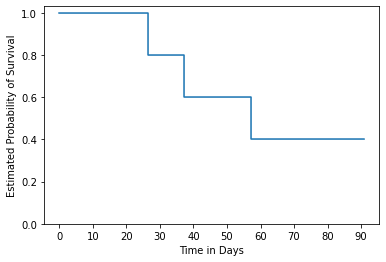

In [5]:
fig, ax = plt.subplots(1,1)
kmf.plot_survival_function(ax=ax)
plt.xlabel('Time in Days')
plt.ylabel("Estimated Probability of Survival")
ax.set_ylim([0,1.03])
ax.set_xticks(np.arange(0, 91, 10))
ax.get_legend().remove();

In [6]:
kmf.predict(50)

0.6000000000000001

###### Confirming using the survive package in Python

In [7]:
surv = survive.SurvivalData('obs_y', status='cens_indicator', data=ex_4_df)

km = survive.KaplanMeier()
km.fit(surv)

KaplanMeier(conf_level=0.95, conf_type='log-log', n_boot=500,
            random_state=None, tie_break='discrete', var_type='greenwood')

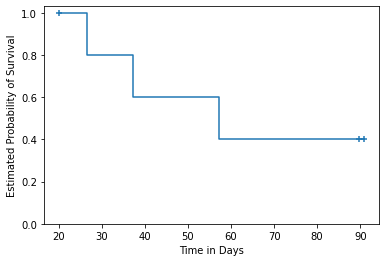

In [8]:
km.plot(ci=False)
plt.xlabel('Time in Days')
plt.ylabel("Estimated Probability of Survival");

In [9]:
km.predict([50])

group,0
time,
50,0.6


### Exercise 5

Sketch the survival function given by the equation

$\begin{equation}
    \hat{S}(t) =
    \left\{
    \begin{aligned}
    \ 0.8\ \ \ \  & \text{if }  & t < 31 \\
    \ 0.5  \ \ \ \ & \text{if }   & 31 \leq t <  77 \\
    \ 0.22  \ \ \ \ & \text{if }   & 77 \leq  t \\
    \end{aligned}
    \right.
\end{equation}$

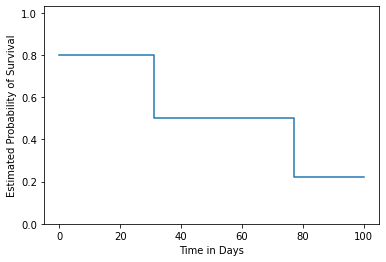

In [10]:
x_s = [0, 31, 77, 100]
y_s = [0.8, 0.5, 0.22, 0.22]
fig, ax = plt.subplots(1,1)
ax.step(x_s, y_s, where='post')
ax.set_xlabel('Time in Days')
ax.set_ylabel('Estimated Probability of Survival')
ax.set_ylim([0,1.03]);

### Exercise 6
This problem makes use of the data in Figure 11.1.  In completing this problem, you can refer to the observaton times as $y_1,...,y_4$.  The ordering of these observation times can be seen from Figure 11.1; their exact values are not required.

![image](./images/fig_11_1.png)

#### 6a) Report the values of $\delta_1,...,\delta_4, K, d_1,...,d_K, r_1,...r_K, \text{ and } q_1,...,q_K$

 * $\delta_1 = \delta_3 = 1$ because patients 1 & 3 are not censored
 * $\delta_2 = \delta_4 = 0$ because patients 2 and 4 are censored
 * $K=2$ because there are two unique "death" times among non censored patients
 * $d_1 \approx 150$ because the first unique "death" time is roughly 150 days
 * $d_K = d_2 = 300$ because the second, or last, "death" time is 300 days
 * $r_1 = 4$ because there are 4 patients at risk (still in the study) at $d_1$
 * $r_K = r_2 = 2$ because there are 2 patients at risk (still in the study) at $d_2$
 * $q_1 = 1$ because one patient "died" at $d_1$
 * $q_K = q_2 = 1$ because one patient "died" at $d_2$

#### 6b) Sketch the Kaplan-Meier survival curve corresponding to this data set.  (You do not need to use any software to do this - you can sketch it by hand using the results obtained in (a).)

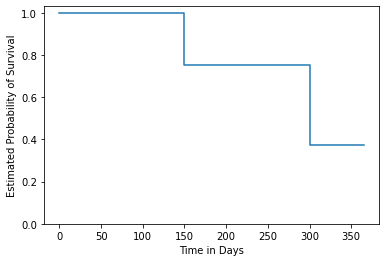

In [11]:
x_s = [0, 150, 300, 365]
y_s = [1, 0.75, 3/8, 3/8]
fig, ax = plt.subplots(1,1)
ax.step(x_s, y_s, where='post')
ax.set_xlabel('Time in Days')
ax.set_ylabel('Estimated Probability of Survival')
ax.set_ylim([0,1.03]);

#### 6c) Based on the survival curve estimated in (b), what is the probability that the event occurs within 200 days?  What is the probability that the event does not occur within 310 days?

$P(t\leq200) = 1 - P(t>200) = 1 - 0.75 = 0.25$

$P((t\leq310)^{C}) = P(t>310) = 0.375$

#### 6d) Write out an expression for the estimated survival curve from (b).

$\begin{equation}
    \hat{S}(t) =
    \left\{
    \begin{aligned}
    \ 1\ \ \ \  & \text{if }  & t < 150 \\
    \ 0.75  \ \ \ \ & \text{if }   & 150 \leq t <  300 \\
    \ 0.375  \ \ \ \ & \text{if }   & 300 \leq  t \\
    \end{aligned}
    \right.
\end{equation}$

### Exercise 7
In this problem, we will derive (11.5) and (11.6), which are needed for the construction of the log-rank test statistic (11.8).  Recall the notation in Table 11.1

![image](./images/table_11_1.png)

#### 7a) Assume that there is no difference between the survival functions of the two groups.  Then we can think of $q_{1k}$ as the number of failures if we draw $r_{1k}$ observations, without replacement, from a risk set of $r_k$  observations that contains a total of $q_k$ failures.  Argue that $q_{1k}$ follows a *hypergeometric distribution*.  Write the parameters of this distribution in terms of $r_{1k}, r_k,$ and $q_k$.

$q_{1k}$ follows a hypergeometric distribution because:

* The population or set to be sampled is a finite population consisting of $N=r_{k}$ observations
* Each observation selected is either a success or a failure, where success is defined as a death occuring, and there are $M=q_{k}$ successes in the population.
* A sample of $n=r_{1k}$ observations are selected without replacement in such a way that each subset of size $n$ is equally likely to be chosen.

$h(x; n, M, N)=h(q_{1k}; r_{1k}, q_k, r_k)$

#### 7b) Given your previous answer, and the properties of the hypergeometric distribution, what are the mean and variance of $q_{1k}$?  Compare your answers to (11.5) and (11.6)

![image](./images/expected_value_q_1k.png)

![image](./images/variance_q_1k.png)

$E(q_{1k})=n\cdot\frac{M}{N}=r_{1k}\cdot\frac{q_k}{r_k}=\frac{r_{1k}}{r_k}\cdot q_k$, which is the same as (11.5)

$V(q_{1k})=(\frac{N-n}{N-1})\cdot n \cdot \frac{M}{N} \cdot (1-\frac{M}{N})$

$=(\frac{r_k-r_{1k}}{r_k-1})\cdot r_{1k} \cdot \frac{q_k}{r_k} \cdot (1-\frac{q_k}{r_k})$

$=(\frac{r_k-r_{1k}}{r_k-1})\cdot r_{1k} \cdot \frac{q_k}{r_k} \cdot (\frac{r_k - q_k}{r_k})$

$=q_k(r_{1k}/r_k)(\frac{r_k - r_{1k}}{r_k-1})(\frac{r_k - q_k}{r_k})$

$=q_k(r_{1k}/r_k)(\frac{r_k - r_{1k}}{r_k})(\frac{r_k - q_k}{r_k-1})$

$=q_k(r_{1k}/r_k)(1-\frac{r_{1k}}{r_k})(\frac{r_k - q_k}{r_k-1})$

$=\frac{q_k(r_{1k}/r_k)(1-r_{1k}/r_k)(r_k - q_k)}{r_k-1}$, which is the same as (11.6)

### Exercise 8
Recall that the survival function $S(t)$, the hazard function $h(t)$, and the density function $f(t)$ are defined in (11.2), (11.9), and (11.11), respectively.  Furthermore, define $F(t) = 1 - S(t)$.  Show that the following relationships hold:
    
$$f(t) = dF(t)/dt$$
$$S(t) = exp \bigl( -\int_0^th(u)du \bigr)$$

![image](./images/survival_function.png)

![image](./images/hazard_function.png)

![image](./images/density_function.png)

For the relationships given in the problem to hold, the relationship between $S(t)$ in (11.2), $h(t)$ in (11.9), and $f(t)$ in (11.11) have to hold.

That relationship is described on pg 470, which is summarized as follows:

$$h(t)=lim_{\Delta t\to 0}\frac{Pr(t<T\leq t + \Delta t | T > t)}{\Delta t}$$
$$h(t)=lim_{\Delta t\to 0}\frac{\frac{Pr((t<T\leq t + \Delta t) \cap (T > t))}{Pr(T > t)}}{\Delta t}$$

$$h(t)=lim_{\Delta t\to 0}\frac{Pr((t<T\leq t + \Delta t) \cap (T > t))}{Pr(T > t)\cdot {\Delta t}}$$

Since survival longer than time t ($T > t$) must occur for survival between time t and t + $\Delta t$ to be possible ($t < T \leq t + \Delta t$), the probability expression in the numerator can be simplified.

$$h(t)=lim_{\Delta t\to 0}\frac{Pr(t<T\leq t + \Delta t)}{Pr(T > t)\cdot {\Delta t}}$$

Since $Pr(T > t)$ doesn't depend on $\Delta t$, we can factor it out of the limit.
$$h(t)=\frac{1}{Pr(T > t)} \cdot lim_{\Delta t\to 0}\frac{Pr(t<T\leq t + \Delta t)}{\Delta t}$$
$$h(t)=\frac{1}{S(t)} \cdot f(t)$$
$$h(t)=\frac{1}{S(t)} \cdot f(t)}$$
$$h(t)=\frac{f(t)}{S(t)}{\blacksquare}$$

In exercise 8, $S(t)$ and $f(t)$ are defined for us, along with $F(t)$.  Using those equations, we can check if the relationship still holds:
$$F(t) = 1 - S(t)$$
$$F(t) = 1 - exp(-\int_0^t h(u)du)$$
$$f(t) = \frac{dF(t)}{dt}$$
$$\frac{d}{dt}[F(t)] = \frac{d}{dt}[1-exp(-\int_0^t h(u)du)]$$
$$\frac{dF(t)}{dt} = -exp(-\int_0^t h(u)du)\cdot\frac{d}{dt}[-\int_0^t h(u)du]$$
$$\frac{dF(t)}{dt} = -exp(-\int_0^t h(u)du)\cdot[-h(t)]$$
$$\frac{dF(t)}{dt} = h(t) \cdot exp(-\int_0^t h(u)du)$$
$$f(t) = h(t) \cdot exp(-\int_0^t h(u)du)$$

$$h(t)=\frac{f(t)}{S(t)}$$
$$h(t)=\frac{h(t) \cdot exp(-\int_0^t h(u)du)}{exp(-\int_0^t h(u)du)}$$
$$h(t)=h(t){\blacksquare}$$

The relationships in (11.2), (11.9), and (11.11) hold for the the $f(t)$ and $S(t)$ given in the problem.

### Exercise 9
In this exercise, we will explore the consequences of assuming that the survival times follow an exponential distribution.

#### 9a) Suppose that survival time follows an $Exp(\lambda)$ distribution, so that its density function is $f(t) = \lambda exp(-\lambda t)$.  Using the relationships provided in Exercise 8, show that $S(t)=exp(-\lambda t)$.

Starting using the relationship from exercise 8:

$$f(t)=\frac{d}{dt}[F(t)]$$
$$f(t)=\frac{d}{dt}[1 - S(t)]$$
$$f(t)=0-\frac{d}{dt}[S(t)]$$
$$-f(t)=\frac{d}{dt}[S(t)]$$
$$\int -f(t)=S(t)$$
$$S(t) = \int -\lambda exp(-\lambda t)$$
$$S(t) = exp(-\lambda t) \blacksquare$$ 

#### 9b) Now suppose that each of $n$ independent surival times follows an $Exp(\lambda)$ distribution.  Write out an expression for the likelihood function (11.13).

![image](./images/likelihood_function.png)

\begin{equation*}
  L=\prod_{i=1}^{n} [\lambda exp(-\lambda y_i)]^{\delta_i} [exp(-\lambda y_i)]^{1-\delta_i} = \prod_{i=1}^{n} \lambda^{\delta_i} exp(-\lambda y_i)
\end{equation*}

\begin{equation*}
  L=\lambda^{\sum_{i=1}^{n} \delta_i}\cdot exp\bigl(-\lambda \sum_{i=1}^{n} y_i\bigr)
\end{equation*}

#### 9c) Show that the maximum likelihood estimator for $\lambda$ is 

\begin{equation*}
  \hat{\lambda} = \sum_{i=1}^{n}\delta_i / \sum_{i=1}^{n} y_i
\end{equation*}

Applying the natural logarithm to our likelihood function from 9b) allows us to use properties of logarithms to simplify the equation so that taking the derivative is easier later.
\begin{equation*}
  ln(L)=ln\Bigl(\lambda^{\sum_{i=1}^{n} \delta_i}\cdot exp\bigl(-\lambda \sum_{i=1}^{n} y_i\bigr)\Bigr)
\end{equation*}

\begin{equation*}
  ln(L)=ln\lambda \sum_{i=1}^{n}\delta_i - \lambda \sum_{i=1}^{n}y_i
\end{equation*}

\begin{equation*}
  \frac{d}{d\lambda}[ln(L)]=\frac{d}{d\lambda}\biggl[ln\lambda \sum_{i=1}^{n}\delta_i - \lambda \sum_{i=1}^{n}y_i\biggr]
\end{equation*}

\begin{equation*}
  \frac{1}{L}\frac{dL}{d\lambda}=\frac{1}{\lambda}\sum_{i=1}^{n} \delta_i - \sum_{i=1}^{n}y_i
\end{equation*}

\begin{equation*}
  \frac{dL}{d\lambda}=[\frac{1}{\lambda} \sum_{i=1}^{n} \delta_i - \sum_{i=1}^{n}y_i]\cdot L
\end{equation*}

\begin{equation*}
  0=[\frac{1}{\lambda} \sum_{i=1}^{n} \delta_i - \sum_{i=1}^{n}y_i]\cdot L
\end{equation*}

\begin{equation*}
  0=\frac{1}{\lambda} \sum_{i=1}^{n} \delta_i - \sum_{i=1}^{n}y_i
\end{equation*}

\begin{equation*}
  \sum_{i=1}^{n}y_i = \frac{1}{\lambda} \sum_{i=1}^{n} \delta_i
\end{equation*}

\begin{equation*}
  \lambda = \frac{\sum_{i=1}^{n} \delta_i}{\sum_{i=1}^{n}y_i}
\end{equation*}

#### 9d) Use your answer to (c) to derive an estimator of the mean survival time.

\begin{equation*}
  E(y_i) = 1 / \lambda
\end{equation*}

\begin{equation*}
  E(y_i) = \frac{1}{\frac{\sum_{i=1}^{n} \delta_i}{\sum_{i=1}^{n} y_i}}
\end{equation*}

\begin{equation*}
  E(y_i) = \frac{\sum_{i=1}^{n} y_i}{\sum_{i=1}^{n} \delta_i}
\end{equation*}

## Applied Exercises

### Exercise 10
This exercises focuses on the brain tumor data, which is included in the ISLR2 R library

#### 10a) Plot the Kaplan-Meier survival curve with $\pm1$ standard error bands, using the `survfit()` function in the `survival` package.

In Python, both the `lifelines` and `survive` modules can produce Kaplan-Meier curves.  `survive` is a great choice if you want to closely mimic R's `survival` package, however it can't fit CoxPH models and it doesn't provide an easy way to access standard errors of the coefficients.  For some of the exercises, I'll use both Python libraries, but for other exercises, I'll only be able to use the `lifelines` library, due to `survival`'s limitations.

In [12]:
brain_cancer_df = pd.read_csv("../datasets/BrainCancer.csv", index_col=0)

##### Using lifelines

In [13]:
# Get two tailed alpha for +/- 1 error bands
z_crit = -1
left_tail_alpha = stats.norm.cdf(z_crit)
two_tail_alpha = 2 * left_tail_alpha

kmf = KaplanMeierFitter(alpha = two_tail_alpha)
kmf.fit(brain_cancer_df['time'], brain_cancer_df['status'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 88 total observations, 53 right-censored observations>

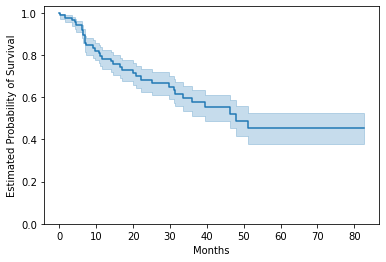

In [14]:
fig, ax = plt.subplots(1,1)
kmf.plot_survival_function(ax=ax)
plt.xlabel('Months')
plt.ylabel('Estimated Probability of Survival')
ax.set_ylim([0,1.03])
ax.set_xticks(np.arange(0, 81, 10))
ax.get_legend().remove();

##### Using survive

In [15]:
surv = survive.SurvivalData('time', status='status', data=brain_cancer_df)

km_surv = survive.KaplanMeier(conf_level=1 - two_tail_alpha)
km_surv.fit(surv)

KaplanMeier(conf_level=0.6826894921370859, conf_type='log-log', n_boot=500,
            random_state=None, tie_break='discrete', var_type='greenwood')

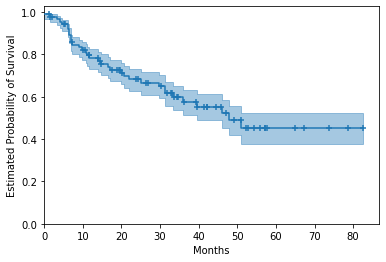

In [16]:
km_surv.plot()
plt.xlabel('Months')
plt.ylabel('Estimated Probability of Survival');

In [17]:
km_surv.summary

Kaplan-Meier estimator

 total  events  censored
    88      35        53

 time  events  at risk  estimate  std. error  68% c.i. lower  68% c.i. upper
 0.07       1       88  0.988636    0.011299        0.969411        0.995804
 1.41       1       86  0.977141    0.015979        0.954181        0.988663
 3.38       1       83  0.965368    0.019651        0.939136        0.980411
 4.16       1       82  0.953595    0.022665        0.924635        0.971597
 4.56       1       81  0.941822    0.025258        0.910500        0.962408
 6.10       1       78  0.929748    0.027670        0.896190        0.952742
 6.23       1       77  0.917673    0.029829        0.882123        0.942848
 6.30       1       76  0.905598    0.031787        0.868250        0.932768
 6.39       1       75  0.893524    0.033578        0.854538        0.922534
 6.82       1       74  0.881449    0.035229        0.840962        0.912167
 6.92       1       73  0.869374    0.036757        0.827504        0.901686
 

Both libraries behave fairly similarly when it comes to plotting the curve.  `survive` is perhaps a little nicer as it automatically plots small markers indicating when an observation became censored. `survive` also produces a nice summary output, making it very similar to R.

#### 10b) Draw a bootstrap sample of size $n=88$ from the pairs $(y_i,\delta_i)$, and compute the resulting Kaplan-Meier survival curve.  Repeat this process $B=200$ times.  Use the results to obtain an estimate of the standard error of the Kaplan-Meier survival curve at each timepoint.  Compare this to the standard errors obtained in (a).

##### Using survive
The survive library makes it very convenient to estimate the standard error using the bootstrap because one can specify `var_type='bootstrap'` and `n_boot=` when creating the model, which will perform the bootstrap process for us.  The one downside is that it doesn't show the standard error for each timepoint, like the question asks, it only shows the standard error for uncensored times in our dataset (status = 1).

In [18]:
# Setting a dummy column "group", which will enable us to group by this field when creating the model.  This enables one to access the km.summary.table object, which is a DataFrame where I can return the unncesored times and the standard error of the coefficient at those times.  I wasn't able to figure out a way to access the km.summary.table object unless a group label was specified, which is why I had to create a dummy one in the first place.
brain_cancer_df['group']='a'

In [19]:
surv = survive.SurvivalData('time', status='status', group='group',data=brain_cancer_df)

km = survive.KaplanMeier(conf_level=1 - two_tail_alpha, conf_type='log', n_boot=200, var_type='bootstrap', random_state=1)
km.fit(surv)

KaplanMeier(conf_level=0.6826894921370859, conf_type='log', n_boot=200,
            random_state=1, tie_break='discrete', var_type='bootstrap')

In [20]:
km.summary.table('a')[['time', 'std. error']]

,time,std. error
0,0.07,0.011719
1,1.41,0.015125
2,3.38,0.018734
3,4.16,0.022315
4,4.56,0.024629
5,6.10,0.026727
6,6.23,0.029731
7,6.30,0.031439
8,6.39,0.033632
9,6.82,0.035353


Comparing the standard errors from the bootstrap in survive is very close to the standard errors generated by using the survive library in part a) to fit the model on our data.  

##### Using lifelines
Unfortunately, lifelines doesn't have any built in way to estimate the standard error using the bootstrap.  Furthermore, it doesn't provide any easily accesible output of what the standard error is when fitting the model, unlike survive.  Because of this deficiency, although we perform the bootstrap process and estimate the standard errors that way, we won't have anything from the lifelines library used in part a) to compare it to.

In [21]:
B = 200
num_observations = brain_cancer_df.shape[0]

idx = kmf.survival_function_.index
bstrap_df = pd.DataFrame(data=[], index=idx)

kmf_bootstrap = KaplanMeierFitter(alpha = two_tail_alpha)


for i in range(B):
    new_sample = brain_cancer_df.sample(n = num_observations,
                                        replace = True,
                                        random_state=i)
    kmf_bootstrap.fit(new_sample['time'], new_sample['status'])
    
    survival_func = kmf_bootstrap.survival_function_
    survival_func.rename(columns={"KM_estimate":F"session_{i+1}"}, inplace=True)
    
    
    bstrap_df = bstrap_df.merge(survival_func, 
                                how='left', 
                                left_index=True,
                                right_index=True)

In [22]:
standard_errors = np.array([])
for i in range(bstrap_df.shape[0]):
    squared_error = (bstrap_df.iloc[i] - bstrap_df.iloc[i].mean())**2
    variance = (squared_error).mean()
    standard_error = np.sqrt(variance)
    standard_errors = np.append(standard_errors, standard_error)
    
errors_df = pd.DataFrame({'time':bstrap_df.index.values,
                          'std_err':standard_errors})
errors_df

,time,std_err
0,0.00,0.000000
1,0.07,0.008796
2,1.18,0.010428
3,1.41,0.014635
4,1.54,0.016831
...,...,...
82,65.02,0.074959
83,67.38,0.073821
84,73.74,0.072977
85,78.75,0.073408


#### 10c) Fit a Cox proportional hazards model that uses all of the predictors to predict survival.  Summarize the main findings.

The `survive` library has no functionality for CoxPH models, however `lifelines` does and will be used to answer any questions relating to a CoxPH model.

In [23]:
cph_ll = CoxPHFitter()
cph_ll_fit = cph_ll.fit(brain_cancer_df.dropna(), 'time', 'status', formula='sex + diagnosis + loc + ki + gtv + stereo')

cph_ll_fit.print_summary()

<lifelines.CoxPHFitter: fitted with 87 total observations, 52 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 87
number of events observed = 35
   partial log-likelihood = -116.75
         time fit was run = 2023-01-28 07:44:31 UTC

---
                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                       
diagnosis[T.LG glioma]   -1.24       0.29       0.58            -2.38            -0.10                 0.09                 0.90
diagnosis[T.Meningioma]  -2.15       0.12       0.45            -3.04            -1.27                 0.05                 0.28
diagnosis[T.Other]       -1.27       0.28       0.62            -2.48            -0.06                 0.08                 0.94
gtv                       0.03       1.03       0.02            -0.01             0.08                 0.99                 1.08
ki                       -0.05       0.95       0.02            -0.09            -0.02                 0.91                 0.98
loc[T.Supratentorial]     0.44       1.55       0.70            -0.94             1.82                 0.39                 6.17
sex[T.Male]               0.18       1.20       0.36            -0.52             0.89                 0.59                 2.44
stereo[T.SRT]             0.18       1.19       0.60            -1.00             1.36                 0.37                 3.88

                          cmp to     z      p   -log2(p)
covariate                                               
diagnosis[T.LG glioma]      0.00 -2.14   0.03       4.95
diagnosis[T.Meningioma]     0.00 -4.78 <0.005      19.14
diagnosis[T.Other]          0.00 -2.05   0.04       4.65
gtv                         0.00  1.54   0.12       3.00
ki                          0.00 -3.00 <0.005       8.54
loc[T.Supratentorial]       0.00  0.63   0.53       0.91
sex[T.Male]                 0.00  0.51   0.61       0.71
stereo[T.SRT]               0.00  0.30   0.77       0.38
---
Concordance = 0.79
Partial AIC = 249.50
log-likelihood ratio test = 41.37 on 8 df
-log2(p) of ll-ratio test = 19.10

When reading the summary output, the interpretation changes based on whether the coefficient is for a qualitative or quantitative factor.  

When looking at qualitative factors, the coefficient is how many times lower or greater the estimated hazard will be between a given level and the baseline level.  For instance, patients with a Diagnosis of T.Menigioma have an estimated hazard rate of $e^{-2.15}=0.12$ times lower than those of the baseline Diagnosis level HG Glioma.  

For quantitative factors, the coefficient is how many times lower or greater the estimated hazard becomes when that factor is increased by one unit.  For instance, an increase of one unit of gtv produces an estimated hazard rate that is $e^{0.03}=1.03$ times higher than before.

The summary indicates that Supratentorial, Male, and SRT produce the largest increases in the hazard rate, however none have p-values that are statistically significant.  Of the variables that are statistically significant at $\alpha=0.05$, Diagnosis LG glioma, Diagnosis Meningioma, Diagnosis Other, and ki, all of their coefficients indicate they'll reduce the hazard rate, with Diagnosis meningioma producing the largest reduction.

#### 10d) Stratify the data by the value of `ki`.  (Since only one observation has `ki=40`, you can group that observation together with the observations that have `ki=60`.) Plot the Kaplan-Meier survival curves for each of the five strata, adjusted for the other predictors.

In [24]:
brain_cancer_df['ki'].unique()

array([ 90,  70,  80, 100,  60,  40])

In [25]:
def ki_grouper(x):
    if x in [40, 60]:
        return 'A'
    elif x == 70:
        return 'B'
    elif x == 80:
        return 'C'
    elif x == 90:
        return 'D'
    elif x == 100:
        return 'E'

In [26]:
brain_cancer_df['group'] = brain_cancer_df['ki'].apply(ki_grouper)

surv_by_ki = survive.SurvivalData(time='time',
                                  status='status', 
                                  group='group',
                                  data=brain_cancer_df)
km = survive.KaplanMeier()
km.fit(surv_by_ki)

KaplanMeier(conf_level=0.95, conf_type='log-log', n_boot=500,
            random_state=None, tie_break='discrete', var_type='greenwood')

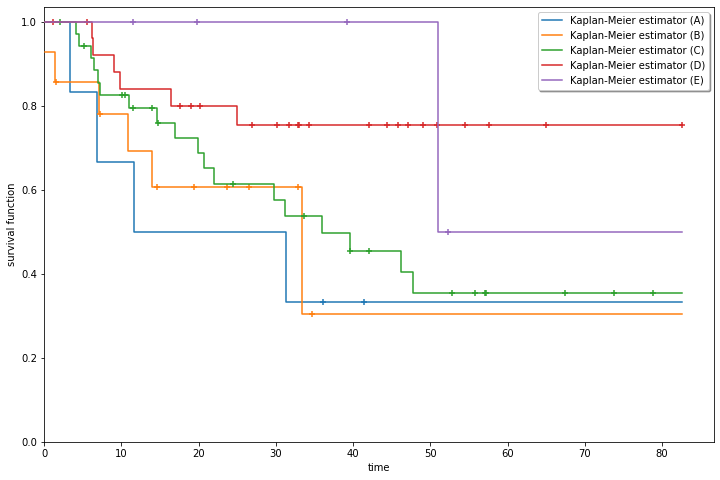

In [27]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
km.plot(ci=False, ax=ax);

## Exercise 11
This example makes use of the data in Table 11.4

![image](./images/tab_11_4.png)

#### 11a) Create two groups of observations.  In Group 1, $X < 2$, whereas in Group 2, $X \geq 2$.  Plot the Kaplan-Meier survival curves corresponding to the two groups.  Be sure to label the curves so that it is clear which curve corresponds to which group.  By eye, does there appear to be a difference between the two groups' survival curves?

In [28]:
def grouper(x):
    if x < 2:
        return "group 1"
    else:
        return "group 2"

In [29]:
ex_4_df['group'] = ex_4_df['cov_x'].apply(grouper)

In [30]:
ex_4_df

,obs_y,cens_indicator,cov_x,group
0,20.2,0,1.8,group 1
1,26.5,1,0.1,group 1
2,37.2,1,11.0,group 2
3,57.3,1,-0.3,group 1
4,89.8,0,0.4,group 1
5,90.8,0,2.8,group 2


In [31]:
surv = survive.SurvivalData(time='obs_y',
                            status='cens_indicator', 
                            group='group',
                            data=ex_4_df)
km = survive.KaplanMeier()
km.fit(surv)

KaplanMeier(conf_level=0.95, conf_type='log-log', n_boot=500,
            random_state=None, tie_break='discrete', var_type='greenwood')

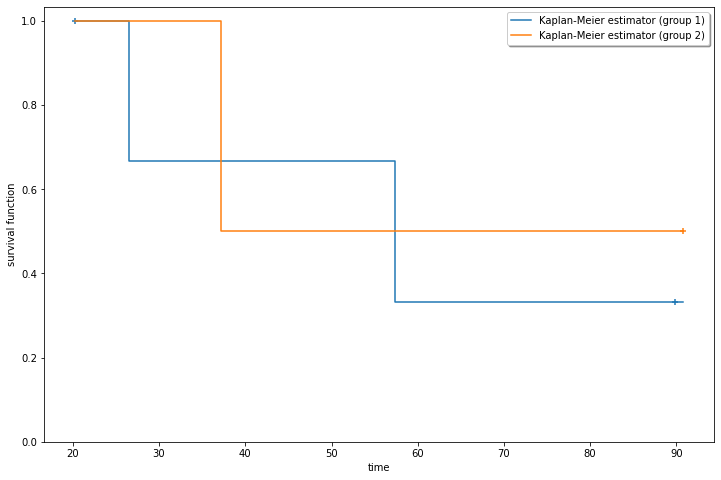

In [32]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
km.plot(ci=False, ax=ax);

Visually, there isn't any indication that one group has better survival rates than the other and overall, any differences are minor.  We see that in the short run, group 2 has survival rates about 40% higher, until roughly 38 units of time.  At that point, group 1 has higher surival rates by about 15-20% until 55 units of time, when group 2 takes the lead again with about a 20% higher survival rate until the study is over.

#### 11b) Fit Cox's proportional hazards model, using the group indicator as a covariate.  What is the estimated coefficient?  Write a sentence providing the interpretation of this coefficient, in terms of the hazard or the instantaneous probability of the event.  Is there evidence that the true coefficient value is non-zero?

In [33]:
cph_ll = CoxPHFitter()
cph_ll_fit = cph_ll.fit(ex_4_df, 'obs_y', 'cens_indicator', formula='group')

cph_ll_fit.print_summary()

<lifelines.CoxPHFitter: fitted with 6 total observations, 3 right-censored observations>
             duration col = 'obs_y'
                event col = 'cens_indicator'
      baseline estimation = breslow
   number of observations = 6
number of events observed = 3
   partial log-likelihood = -4.06
         time fit was run = 2023-01-28 07:44:32 UTC

---
                   coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                
group[T.group 2]  -0.34       0.71       1.24            -2.76             2.08                 0.06                 8.02

                   cmp to     z    p   -log2(p)
covariate                                      
group[T.group 2]     0.00 -0.28 0.78       0.35
---
Concordance = 0.56
Partial AIC = 10.11
log-likelihood ratio test = 0.08 on 1 df
-log2(p) of ll-ratio test = 0.36

The estimated coefficient is -0.34 for group 2, which means that the risk for those in group 2 is $\approx 0.71 \text{ times (i.e. } e^{-0.34})$ the risk for those in the baseline group (group 1).  Because the p-value is so high $(p=0.78)$, there isn't sufficient evidence to conclude that the true coefficient value is non-zero, indicating no difference in risk between the two groups.

#### 11c) Recall from Section 11.5.2 that in the case of a single binary covariate, the log-rank test statistic should be identical to the score statistic from the Cox model.  Conduct a log-rank test to determine whether there is a difference between the survival curves for the two groups.  How does the *p*-value for the log-rank test statistic compare to the *p*-value for the score statistic for the Cox model from (b)?

`survive` also didn't have any way to perform a log-rank test, but `lifelines` did.

In [34]:
group_1 = (ex_4_df['group'] == 'group 1')
group_2 = (ex_4_df['group'] == 'group 2')

results = logrank_test(ex_4_df['obs_y'][group_1], 
                       ex_4_df['obs_y'][group_2],
                       event_observed_A=ex_4_df['cens_indicator'][group_1],
                       event_observed_B=ex_4_df['cens_indicator'][group_2]
                      )

results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.08 0.78      0.35

As expected, the test statistic from the log-rank test (0.08) is the same as the log-likelihood ratio test score from the Cox model.  Furthermore, the *p*-value from the log-rank test (0.78) is the same as the *p*-value for the coefficient from the Cox model.

The End